In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout

# CIFAR10 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # conv2d
    AveragePooling2D(pool_size=(2, 2)),                             # average_pooling2d
    BatchNormalization(),                                          # batch_normalization

    Conv2D(64, (3, 3), activation='relu'),                         # conv2d_1
    AveragePooling2D(pool_size=(2, 2)),                             # average_pooling2d_1
    BatchNormalization(),                                          # batch_normalization_1

    Flatten(),                                                     # flatten
    Dense(256, activation='relu'),                                 # dense
    Dropout(0.5),                                                  # dropout
    Dense(10, activation='softmax')                                # dense_1 (출력층)
])

# 모델 요약 출력
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

ID 4794: 라벨이 'deer'에서 'bird'로 변경되었습니다.
ID 5960: 라벨이 'bird'에서 'cat'로 변경되었습니다.
ID 7846: 라벨이 'frog'에서 'cat'로 변경되었습니다.


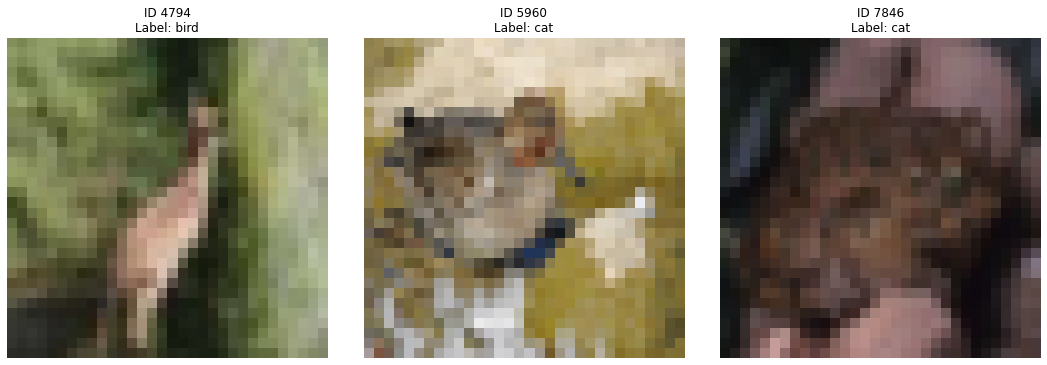



ID 5468: 라벨이 'dog'에서 'cat'로 변경되었습니다.
ID 2592: 라벨이 'bird'에서 'deer'로 변경되었습니다.
ID 5690: 라벨이 'horse'에서 'deer'로 변경되었습니다.


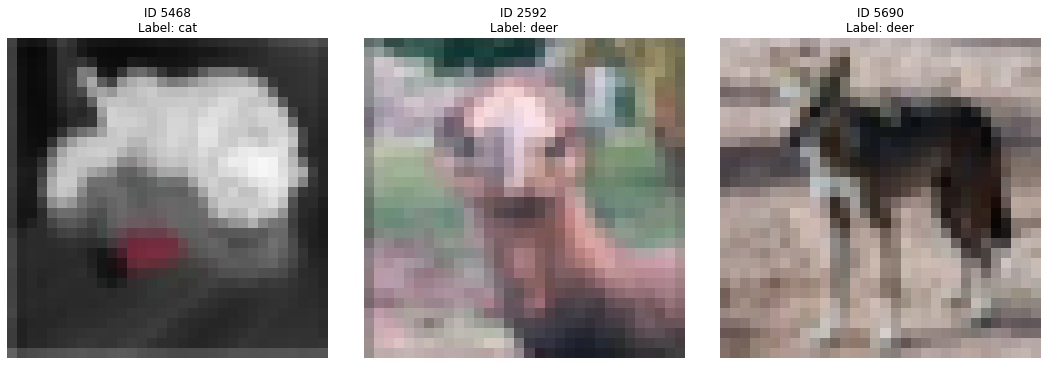



ID 2804: 라벨이 'cat'에서 'dog'로 변경되었습니다.
ID 1227: 라벨이 'cat'에서 'dog'로 변경되었습니다.
ID 5191: 라벨이 'cat'에서 'dog'로 변경되었습니다.


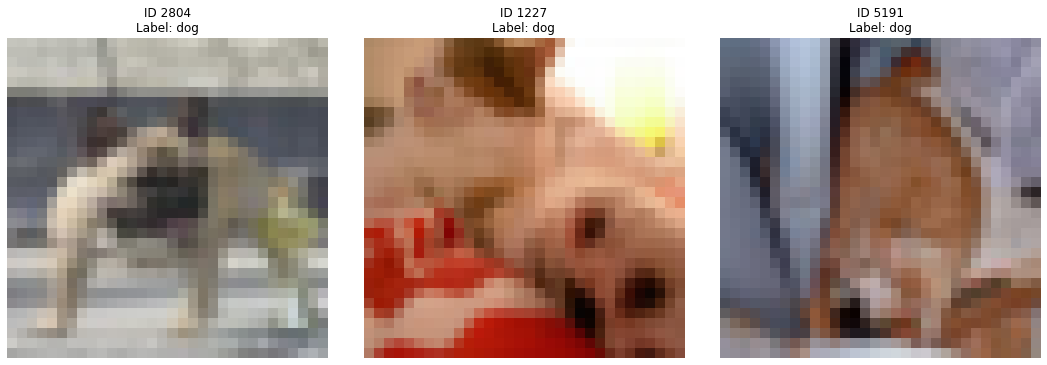



ID 5632: 라벨이 'cat'에서 'dog'로 변경되었습니다.
ID 2405: 라벨이 'cat'에서 'frog'로 변경되었습니다.
ID 7657: 라벨이 'bird'에서 'horse'로 변경되었습니다.


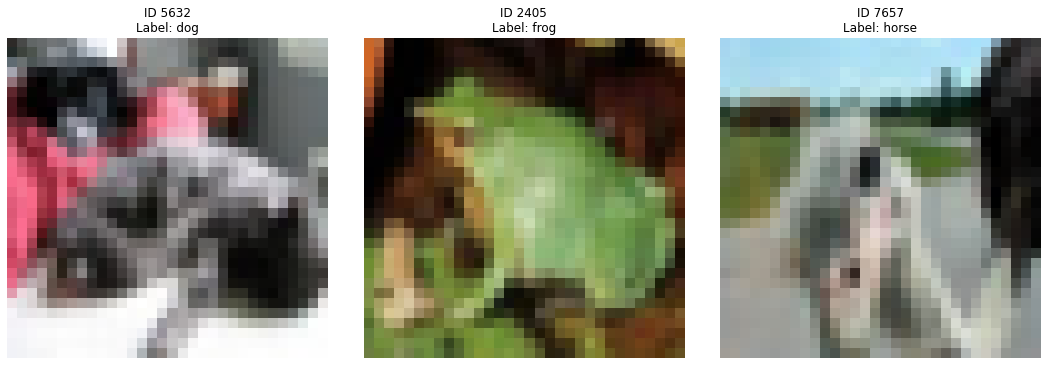



ID 8058: 라벨이 'deer'에서 'horse'로 변경되었습니다.
ID 6877: 라벨이 'airplane'에서 'ship'로 변경되었습니다.
ID 2532: 라벨이 'airplane'에서 'ship'로 변경되었습니다.


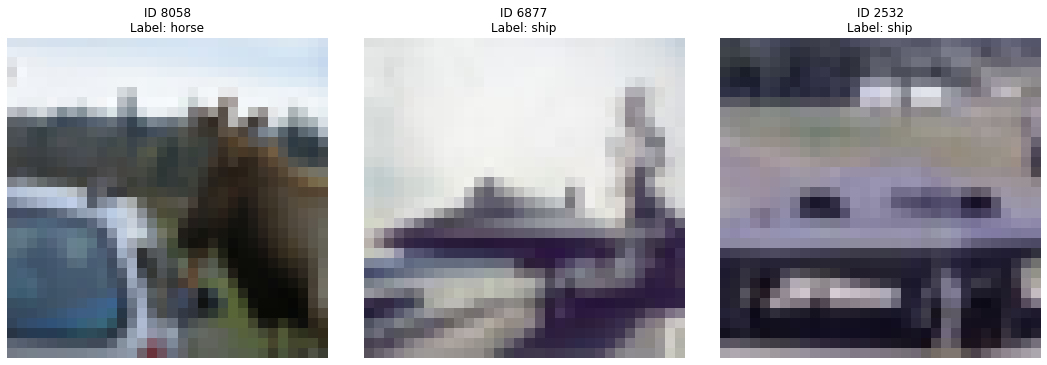



ID 1718: 라벨이 'airplane'에서 'ship'로 변경되었습니다.
ID 6966: 라벨이 'airplane'에서 'ship'로 변경되었습니다.
ID 165: 라벨이 'deer'에서 'ship'로 변경되었습니다.


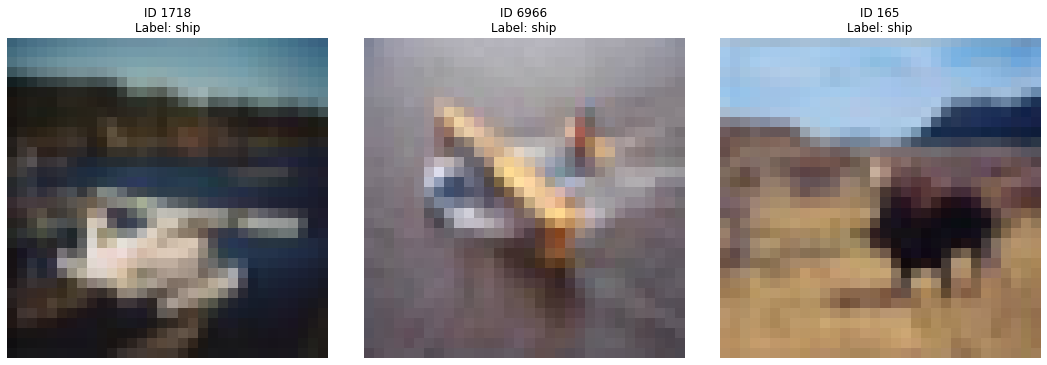



ID 6792: 라벨이 'cat'에서 'truck'로 변경되었습니다.
ID 1969: 라벨이 'automobile'에서 'truck'로 변경되었습니다.
ID 9227: 라벨이 'automobile'에서 'truck'로 변경되었습니다.


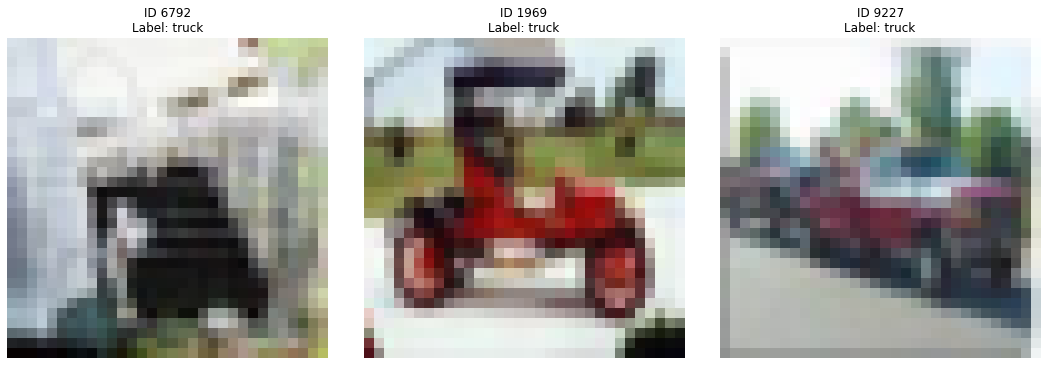



ID 9352: 라벨이 'automobile'에서 'truck'로 변경되었습니다.


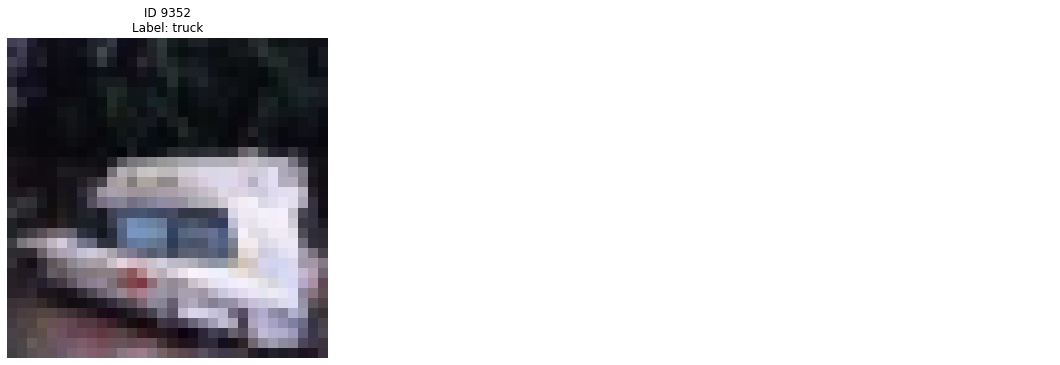

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# CIFAR-10 클래스 이름 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# CIFAR-10 데이터 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 특정 ID의 정보를 출력, 시각화, 그리고 라벨을 수정하는 함수
def show_and_edit_label(image_id, new_label):
    if image_id < 0 or image_id >= len(x_test):
        print(f"유효하지 않은 ID입니다. ID는 0에서 {len(x_test)-1} 사이여야 합니다.")
        return None
    
    # 현재 이미지와 라벨 정보 가져오기
    image = x_test[image_id]
    label_number = y_test[image_id][0]
    label_name = class_names[label_number]
    
    # 라벨 변경
    y_test[image_id] = new_label
    updated_label_name = class_names[new_label]
    
    # 변경 결과 출력
    print(f"ID {image_id}: 라벨이 '\033[1m{label_name}\033[0m'에서 '\033[1m{updated_label_name}\033[0m'로 변경되었습니다.")
    
    # 이미지와 변경된 정보 반환
    return image, updated_label_name, image_id

# 가로로 이미지를 출력하는 함수 정의 (1행에 최대 n개)
def display_images(images_info, cols=3):
    rows = (len(images_info) + cols - 1) // cols  # 행 개수 계산
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    
    for i in range(rows * cols):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]
        
        if i < len(images_info):
            image, label_name, image_id = images_info[i]
            ax.imshow(image)
            ax.set_title(f"ID {image_id}\nLabel: {label_name}")
            ax.axis('off')
        else:
            ax.axis('off') 
    
    plt.tight_layout()
    plt.show()

# CIFAR-10 클래스 이름과 ID를 묶은 변수 (변경된 클래스 번호 오름차순으로 정렬)
label_changes = {
    4794: 2,  # 1. deer -> bird
    5960: 3,  # 2. bird -> cat
    7846: 3,  # 3. frog -> cat
    5468: 3,  # 4. dog -> cat
    2592: 4,  # 5. bird -> deer
    5690: 4,   # 18. horse -> deer (추가된 ID)
    2804: 5,  # 6. cat -> dog
    1227: 5,  # 7. cat -> dog
    5191: 5,  # 8. cat -> dog
    5632: 5,  # 9. cat -> dog
    2405: 6,  # 10. cat -> frog
    7657: 7,  # 11. bird -> horse
    8058: 7,  # 12. deer -> horse
    6877: 8,  # 13. airplane -> ship
    2532: 8,  # 14. airplane -> ship
    1718: 8,  # 15. airplane -> ship
    6966: 8,  # 16. airplane -> ship
    165:   8, # 17. deer -> ship
    6792: 9,   # 19. cat -> truck (추가된 ID)
    1969: 9,   # 20. automobile -> truck
    9227: 9,   # 21. automobile -> truck
    9352: 9    # 22. automobile -> truck
}


# 함수 실행 및 결과 묶음 출력 (1행에 최대 n개)
edited_images = []

for i, (image_id, new_label) in enumerate(label_changes.items()):
    result = show_and_edit_label(image_id, new_label)
    
    if result:
        edited_images.append(result)
    
    # 매 3개마다 이미지를 출력
    if (len(edited_images) % 3 == 0):
        display_images(edited_images[-3:])  # 마지막 3개 출력
        print("\n" + "=" * 90 + "\n")

# 마지막 남은 이미지를 따로 출력
if len(edited_images) % 3 != 0:
    display_images(edited_images[-(len(edited_images) % 3):])
    print("\n" + "=" * 90 + "\n")




In [3]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# 모델 빌더 함수 정의 (KerasTuner에서 사용)
def build_model(hp):
    model = Sequential([
        Conv2D(hp.Int('conv1_filters', min_value=32, max_value=128, step=32), 
               (3, 3), activation='relu', input_shape=(32, 32, 3)),
        AveragePooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(hp.Int('conv2_filters', min_value=64, max_value=256, step=64), 
               (3, 3), activation='relu'),
        AveragePooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),
        Dense(hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'),
        Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1)),
        Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4])),
        loss=SparseCategoricalCrossentropy(),
        metrics=[SparseCategoricalAccuracy()]
    )
    
    return model



/tmp/ipykernel_2660/334999859.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [4]:
# KerasTuner RandomSearch 객체 생성
tuner = RandomSearch(
    build_model,
    objective='val_sparse_categorical_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='cifar10_tuning',
    project_name='cifar10'
)

# 데이터셋 준비
x_train = x_train / 255.0
x_test = x_test / 255.0

# 하이퍼파라미터 검색 수행
tuner.search(x_train, y_train, epochs=10, validation_split=0.2)

# 최적의 하이퍼파라미터 출력
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
최적의 하이퍼파라미터:
- conv1_filters: {best_hps.get('conv1_filters')}
- conv2_filters: {best_hps.get('conv2_filters')}
- dense_units: {best_hps.get('dense_units')}
- dropout_rate: {best_hps.get('dropout_rate')}
- learning_rate: {best_hps.get('learning_rate')}
""")


Trial 10 Complete [00h 01m 04s]
val_sparse_categorical_accuracy: 0.7268000245094299

Best val_sparse_categorical_accuracy So Far: 0.7268000245094299
Total elapsed time: 00h 13m 36s

최적의 하이퍼파라미터:
- conv1_filters: 128
- conv2_filters: 192
- dense_units: 128
- dropout_rate: 0.3
- learning_rate: 0.0001



In [5]:

# 최적의 하이퍼파라미터로 모델 학습
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

# 테스트 데이터 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc:.4f}")


Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6742 - sparse_categorical_accuracy: 0.4322 - val_loss: 1.2867 - val_sparse_categorical_accuracy: 0.5477
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2583 - sparse_categorical_accuracy: 0.5636 - val_loss: 1.1182 - val_sparse_categorical_accuracy: 0.6083
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0488 - sparse_categorical_accuracy: 0.6335 - val_loss: 1.0840 - val_sparse_categorical_accuracy: 0.6246
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9049 - sparse_categorical_accuracy: 0.6862 - val_loss: 1.0036 - val_sparse_categorical_accuracy: 0.6494
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7908 - sparse_categorical_accuracy: 0.7254 - val_loss: 0.8911 - val_sparse_categorical_accuracy: 0.6952
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6866 - spars

In [6]:
import os

# SavedModel 형식으로 모델 저장
saved_model_dir = "saved_model/cifar10_model"
os.makedirs(saved_model_dir, exist_ok=True)
model.save(saved_model_dir)

print(f"모델이 SavedModel 형식으로 저장되었습니다: {saved_model_dir}")

INFO:tensorflow:Assets written to: saved_model/cifar10_model/assets
모델이 SavedModel 형식으로 저장되었습니다: saved_model/cifar10_model
